<a href="https://colab.research.google.com/github/BecomeAllan/ML-SLRC/blob/main/Classification_automation_SLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install S2query
!pip install transformers==4.16.2
!pip install torchmetrics==0.8.0

# !pip install matplotlib==3.5.1

  Created wheel for S2query: filename=S2query-1.0.1-py3-none-any.whl size=13813 sha256=181733dd65748426acebef55f226cb01414d617d4c5e7628dfc1fba0e89c032f
  Stored in directory: /root/.cache/pip/wheels/0d/51/a6/caf5f4d3835487cf1fea19f56dc3537413cb69195a7530ffb0
Successfully built S2query
     |████████████████████████████████| 3.5 MB 37.3 MB/s 
     |████████████████████████████████| 880 kB 60.5 MB/s 
     |████████████████████████████████| 84 kB 4.1 MB/s 
     |████████████████████████████████| 6.6 MB 60.8 MB/s 
     |████████████████████████████████| 596 kB 68.0 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=55d7d1f3968e13b78352df975f1a41b460e6b13c08456c6c4a1694d62efeab54
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully unin

# Search no Semantic scholar

In [2]:
from itertools import chain
import numpy as np


## Utilizando a API para fazer a busca de dados

In [3]:
from S2query import S2paperAPI

import pandas as pd
import ipywidgets as widgets
from IPython.display import HTML, display, clear_output
import unicodedata
import re
import time


class SearcherAPI():
  def __init__(self):
    # cria o objeto para puxar os dados
    self.obj = S2paperAPI()

    # Cria os buttoes/textbox
    self.search_b = widgets.Button(description="Search")
    self.search_text =  widgets.Textarea(
    value="'artificial intelligence'+'Deep Learning'",
    placeholder='Type something',
    # description=':',
    disabled=False
)
    # Configura a localizacao dos botoes/textbox
    self.hbox = widgets.HBox([self.search_b, self.search_text])    
    
    # Funcao quando clicar o botao
    self.search_b.on_click(self.search_button)


  # Search button
  def search_button(self, p):
    print(self.search_text.value)
    # Busca os dados
    self.obj.get(self.search_text.value, n=100, sort = "total-citations", fieldsOfStudy = ['biology'])

    # Guarda os dados achados
    self.data = self.obj.all
  
  # Funcao para chamar a classe
  def __call__(self):
    clear_output()
    # Mostra os butoes
    display(self.hbox)

    

result = SearcherAPI()
result()

In [4]:
result.data.head()

AttributeError: ignored

## Utilizando a Web para fazer a busca de dados

In [5]:
from S2query import S2paperWeb

import pandas as pd
import ipywidgets as widgets
from IPython.display import HTML, display, clear_output
import unicodedata
import re
import time


class SearcherWeb():
  def __init__(self):
    # cria o objeto para puxar os dados
    self.obj = S2paperWeb()

    # Cria os buttoes/textbox
    self.search_b = widgets.Button(description="Search")
    self.search_text =  widgets.Textarea(
    value="'artificial intelligence'+'Deep Learning'",
    placeholder='Type something',
    # description=':',
    disabled=False
)
    # Configura a localizacao dos botoes/textbox
    self.hbox = widgets.HBox([self.search_b, self.search_text])

    # Funcao quando clicar o botao
    self.search_b.on_click(self.search_button)


  # Search button
  def search_button(self, p):
    print(self.search_text.value)
    # Busca os dados
    self.obj.get(self.search_text.value, n=100,
                 sort = "relevance", fieldsOfStudy = [],
                 publicationTypes = ['JournalArticle'])

    # Guarda os dados achados
    self.data = self.prepare_data(self.obj.all)
  
  # cria um subset dictionary da funcao que busca os dados
  def subset(self, dicttosub):
    # Seleciona apenas ('title','paperAbstract','year', 'links')
    subdict = {k:dicttosub[k] for k in ('title','paperAbstract','year', 'links')}

    # Renomeia a key do dictionar
    subdict['abstract'] = subdict.pop('paperAbstract')
    
    # Guarda apenas um link de referencia
    try:
      subdict['links'] = subdict['links'][0]['url']
    except:
      subdict['links'] = np.nan
    return subdict

  # Trata os dados para transformar de json para pandas.dataframe
  def prepare_data(self, data):

    # Loop sobre os resultados para selecionar tudo em uma lista
    papers = []
    for x in data['Results']:
      papers_page = [self.subset(paper) for paper in x['Page']['Papers']]
      papers.append(papers_page)
    papers = list(chain.from_iterable(papers))

    # Transforma em Pandas
    data = pd.DataFrame(papers)
    return data
  
  # Funcao para chamar a classe
  def __call__(self):
    clear_output()
    # Mostra os butoes
    display(self.hbox)


result = SearcherWeb()
result.hbox
result()

'artificial intelligence'+'Deep Learning'


Searching...


[_runtime]>> Start searching...

 ---
Total Results: 45363
Total Pages: 4536
Query Suggestions: []
--- 

[_extract] >> extracting relevant data.
[_extract]>> Took 3.02s
[_runtime]>> Took 8.92s
[get]>> Took 9.01s


In [6]:
result.data.head(10)

,title,year,links,abstract
0,Artificial intelligence: Deep learning in onco...,2021,https://www.ncbi.nlm.nih.gov/pubmed/33765601,
1,Unseen Artificial Intelligence—Deep Learning P...,2021,https://pdfs.semanticscholar.org/a773/bea81b77...,Background: The early detection of carotid wal...
2,"Presenting artificial intelligence, deep learn...",2021,https://doi.org/10.1080/17453674.2021.1918389,Background and purpose — Artificial intelligen...
3,Combining artificial intelligence: deep learni...,2021,https://www.ncbi.nlm.nih.gov/pubmed/33196774,MOTIVATION\nAlthough genome-wide association s...
4,Application of artificial intelligence deep le...,2021,https://doi.org/10.1007/s11356-021-13680-5,Seawater intrusion not only causes fresh water...
5,An artificial intelligence deep learning model...,2021,https://www.ncbi.nlm.nih.gov/pubmed/33904763,Objectives: Small bowel obstruction is a commo...
6,Accuracy of an Artificial Intelligence Deep Le...,2020,https://doi.org/10.1097/RTI.0000000000000491,PURPOSE\nThe purpose of this study was to eval...
7,Use of Artificial Intelligence Deep Learning t...,2020,https://doi.org/10.1177/0003134820953779,Background Society consensus guidelines are co...
8,Quantitative neurotoxicology: Potential role o...,2020,https://doi.org/10.1002/jat.4098,Neurotoxicity studies are important in the pre...
9,Artificial intelligence deep learning algorith...,2019,https://doi.org/10.1117/1.NPh.6.4.041110,Abstract. Spectral-domain optical coherence to...


# Classificação dos dados não rotulados

primeira classificação dos dados para poder treinar o modelo

In [7]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import HTML, display, clear_output, Markdown
import unicodedata
import re
import time
from scipy.stats import poisson



class Judger():
  def __init__(self, data, configure_text= True):
    self.data = data

    self.selected_indx = []
    self.included_count = 0
    self.excluded_count = 0
    
    if configure_text:
      # cria uma coluca no data como text (title + abstract) para ser classificado pelo oraculo
      self.data.fillna(value='', inplace=True)
      self.data['text'] = self.data['title']  +'. ' + self.data['abstract']
      self.data['label'] = np.nan

    # Cria os buttoes
    self.Included = widgets.Button(description="Included")
    self.NIncluded = widgets.Button(description="Not Included")
    self.pass_b = widgets.Button(description="Pass")

    # Configura a localizacao dos botoes
    self.hbox = widgets.HBox([self.NIncluded, self.Included, self.pass_b])    
    
    # Funcao quando clicar o botao
    self.Included.on_click(self.Included_button)
    self.NIncluded.on_click(self.Not_Included_button)
    self.pass_b.on_click(self.pass_button)


  # Incluir na revisao button
  def Included_button(self, p):
    self.data.loc[self.index, 'label'] = 'positive'
    self.included_count += 1
    self.__call__()

  # Excluir da revisao button
  def Not_Included_button(self, p):
    self.data.loc[self.index, 'label'] = 'negative'
    self.excluded_count += 1
    self.__call__()

  # Excluir da revisao button
  def pass_button(self, p):
    self.__call__()
  
  def __call__(self):
    clear_output()
    # Quais dados sao nao  rotulados
    criteria_na = self.data['label'].isna()

    # Se acabar de rotular todos os dados
    if sum(criteria_na) == 0:
      return print('Finish')

    # Index aleatorio para selecionar um texto para classificacao
    indexs_unlabeled = self.data.loc[criteria_na].index
    prob = poisson.cdf(indexs_unlabeled, mu=1)
    prob = prob/sum(prob)
    self.index = np.random.choice(indexs_unlabeled, 1,
                                  replace=False,
                                  p = prob
                                  ).item()

    # Guarda qual index foi separado pra classificar
    self.selected_indx.append(self.index)

    # Texto e Label do index aleatorio
    text = self.data.loc[self.index, 'text']
    label = self.data.loc[self.index, 'label']
    
    
    # Print de alguns resultados
    print('Unlabed:', sum(criteria_na))
    print(
          "Not included examples:", self.excluded_count,"|",
          "Included examples:", self.included_count)
    display(self.hbox)
    print('Previos Label:', label)
    print('Text:')
    display(Markdown(text))


In [8]:
Judged = Judger(result.data)

Judged()

Unlabed: 85
Not included examples: 8 | Included examples: 7


Previos Label: nan
Text:


Deep Learning in Medical Image Analysis.. Deep learning is the state-of-the-art machine learning approach. The success of deep learning in many pattern recognition applications has brought excitement and high expectations that deep learning, or artificial intelligence (AI), can bring revolutionary changes in health care. Early studies of deep learning applied to lesion detection or classification have reported superior performance compared to those by conventional techniques or even better than radiologists in some tasks. The potential of applying deep-learning-based medical image analysis to computer-aided diagnosis (CAD), thus providing decision support to clinicians and improving the accuracy and efficiency of various diagnostic and treatment processes, has spurred new research and development efforts in CAD. Despite the optimism in this new era of machine learning, the development and implementation of CAD or AI tools in clinical practice face many challenges. In this chapter, we will discuss some of these issues and efforts needed to develop robust deep-learning-based CAD tools and integrate these tools into the clinical workflow, thereby advancing towards the goal of providing reliable intelligent aids for patient care.

In [9]:
data = Judged.data.loc[:,['label', 'text']]
data.head()

,label,text
0,NaN,Artificial intelligence: Deep learning in onco...
1,NaN,Unseen Artificial Intelligence—Deep Learning P...
2,NaN,"Presenting artificial intelligence, deep learn..."
3,NaN,Combining artificial intelligence: deep learni...
4,NaN,Application of artificial intelligence deep le...


# Treinando o modelo para rotular os dados nao rotulados

In [10]:
!git lfs install
!git clone https://huggingface.co/becomeallan/ML-SLRC

Error: Failed to call git rev-parse --git-dir --show-toplevel: "fatal: not a git repository (or any of the parent directories): .git\n"
Git LFS initialized.
Cloning into 'ML-SLRC'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 25 (delta 9), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (25/25), done.


In [11]:
import sys
sys.path.append('/content/ML-SLRC/')

In [12]:
%matplotlib inline
import torch.nn.functional as F
import torch.nn as nn
import math
import torch
import numpy as np
import pandas as pd
import time
import transformers
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.manifold import TSNE
from copy import deepcopy, copy
import seaborn as sns
import matplotlib.pylab as plt
from pprint import pprint
import shutil
import datetime
import re
import json
from pathlib import Path

SEED = 2222

gen_seed = torch.Generator().manual_seed(SEED)

##  Baixa o modelo pre-treinado ML-SLRC

In [13]:
path = '/content/ML-SLRC/'

model_path = path + 'model.pt'
info_path = path + 'Info.json'

In [14]:
from Util_funs import SLR_Classifier, Encoder, SLR_DataSet

# Baixa o modelo
model = torch.load(model_path)

In [15]:
from Util_funs import train_loop, prepare_data

# Baixa as meta informações do modelo treinado
with open(info_path, 'r') as f:
  Info = json.load(f)


# Configura algumas meta informações
Info["tokenizer"] = AutoTokenizer.from_pretrained(Info['model'],
                                          do_lower_case = True)
Info['tresh'] = 0.9
Info["inner_update_step_eval"] = 3
Info["inner_print"] = 1

Downloading:   0%|          | 0.00/385 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/223k [00:00<?, ?B/s]

## Treina o modelo

In [21]:
import tqdm
import pandas as pd
import ipywidgets as widgets
from IPython.display import HTML, display, clear_output, Markdown
import unicodedata
import re
import time

# Tipo de device para colocar o modelo  (GPU, CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class Train():
  def __init__(self, model, data, device, Info):
    self.data = data
    self.model = model
    self.Info= Info
    self.device = device

    self.index = 0

    # Cria o butao
    self.train_b = widgets.Button(description="Train")
    
    # Configura a localizacao dos botoes
    self.hbox = widgets.HBox([self.train_b])
    
    # Funcao quando clicar o botao
    self.train_b.on_click(self.train_button)



  # Train button
  def train_button(self, p):
    clear_output()
    print('Traning...')
    # Pre-processa os textos dos dados para passar no modelo
    self.data_train_loader, self.data_test_loader, self.data_train, self.data_test = prepare_data(self.data,
              train_size_per_class = 4,
              batch_size = {'train': self.Info['inner_batch_size'],
                            'test': 2},
              max_seq_length = self.Info['max_seq_length'],
              tokenizer = self.Info['tokenizer'],
              input = "text",
              output = "label")


    
    # Treina o modelo e pega o vetor da camada classifier
    self.logits, _, _, _ = train_loop(self.data_train_loader, self.data_test_loader,
                                                        self.model, self.device,
                                                        epoch = self.Info['inner_update_step'],
                                                        lr=self.Info['inner_update_lr'],
                                                        print_info=True,
                                                        name = 'test')


    # Sigmoid para deixar entre 0 e 1 a confiança das predições
    predictions = torch.sigmoid(self.logits) 

    # Guarda as predições nos dados de teste
    self.data_test['prediction'] = predictions

    self.__call__()
    print('Done')

  
  def __call__(self):
    

    display(self.hbox)



t = Train(model,data, device, Info)

t()

Traning...
Loss:  2.3553309440612793
Loss:  0.8607308864593506


Test validation | test: 100%|███████████████████| 46/46 [00:01<00:00, 39.36it/s]


Done


In [22]:
t.data_test.sample(5)

,label,text,prediction
37,NaN,Diagnostic ability of artificial intelligence ...,0.393219
98,NaN,Deep Learning in Medical Image Analysis.. Deep...,0.780768
45,NaN,Artificial Intelligence in the Rising Wave of ...,0.675021
67,NaN,High-performance medicine: the convergence of ...,0.775737
87,NaN,A survey of deep learning techniques for auton...,0.576016


# Utilizando o modelo treinado para rankear as predições

In [23]:
# Classe que passa pelos textos para avaliar o criterio de rankeamento e classificacao do modelo
class Ranker():
  def __init__(self, data_test, treshold):
    self.treshold = treshold
    self.data = data_test.reset_index().drop("index", axis=1)

    self.index = 0

    # Cria os butoes
    self.next_b = widgets.Button(description="Next")
    self.previous_b = widgets.Button(description="Previous")

    # Configura a localizacao dos botoes
    self.hbox = widgets.HBox([self.previous_b, self.next_b])    

    # Funcao quando clicar nos botoes
    self.next_b.on_click(self.next_button)
    self.previous_b.on_click(self.prev_button)


  # Next button
  def next_button(self, p):
    # Testa se é possivel ir pro proximo texto
    try:
      self.index +=1
      text = self.data.loc[self.index, 'text']
    except:
      self.index =0

    self.__call__()

  # Prev button
  def prev_button(self, p):
    # Testa se é possivel ir pro texto anterior
    try:
      self.index -=1
      text = self.data.loc[self.index, 'text']
    except:
      self.index = len(self.data) - 1

    
    self.__call__()


  def __call__(self):
    clear_output()

    # Mostra os butoes
    display(self.hbox)

    # Pega o texto e a predicao do indice para avaliacao
    text = self.data.loc[self.index, 'text']
    prediction = self.data.loc[self.index, 'prediction']
    label = self.data.loc[self.index, 'label']

    # Mostra alguns resultados
    print('Label:', label)
    print('Prediction:', prediction)
    print('Included:', self.treshold <= prediction)
    print('Text:')
    display(Markdown(text))



In [24]:
r = Ranker(t.data_test, 0.5)
r()

Label: negative
Prediction: 0.7711336
Included: True
Text:


Deep‐learning artificial intelligence analysis of clinical variables predicts mortality in COVID‐19 patients. The large number of clinical variables associated with coronavirus disease 2019 (COVID‐19) infection makes it challenging for frontline physicians to effectively triage COVID‐19 patients during the pandemic. This study aimed to develop an efficient deep‐learning artificial intelligence algorithm to identify top clinical variable predictors and derive a risk stratification score system to help clinicians triage COVID‐19 patients.

In [25]:
ranked_test_data = t.data_test.sort_values('prediction', ascending=False)

r = Ranker(ranked_test_data, treshold=0.5)
r()

Label: nan
Prediction: 0.82783896
Included: True
Text:


Artificial intelligence versus clinicians: systematic review of design, reporting standards, and claims of deep learning studies. Abstract Objective To systematically examine the design, reporting standards, risk of bias, and claims of studies comparing the performance of diagnostic deep learning algorithms for medical imaging with that of expert clinicians. Design Systematic review. Data sources Medline, Embase, Cochrane Central Register of Controlled Trials, and the World Health Organization trial registry from 2010 to June 2019. Eligibility criteria for selecting studies Randomised trial registrations and non-randomised studies comparing the performance of a deep learning algorithm in medical imaging with a contemporary group of one or more expert clinicians. Medical imaging has seen a growing interest in deep learning research. The main distinguishing feature of convolutional neural networks (CNNs) in deep learning is that when CNNs are fed with raw data, they develop their own representations needed for pattern recognition. The algorithm learns for itself the features of an image that are important for classification rather than being told by humans which features to use. The selected studies aimed to use medical imaging for predicting absolute risk of existing disease or classification into diagnostic groups (eg, disease or non-disease). For example, raw chest radiographs tagged with a label such as pneumothorax or no pneumothorax and the CNN learning which pixel patterns suggest pneumothorax. Review methods Adherence to reporting standards was assessed by using CONSORT (consolidated standards of reporting trials) for randomised studies and TRIPOD (transparent reporting of a multivariable prediction model for individual prognosis or diagnosis) for non-randomised studies. Risk of bias was assessed by using the Cochrane risk of bias tool for randomised studies and PROBAST (prediction model risk of bias assessment tool) for non-randomised studies. Results Only 10 records were found for deep learning randomised clinical trials, two of which have been published (with low risk of bias, except for lack of blinding, and high adherence to reporting standards) and eight are ongoing. Of 81 non-randomised clinical trials identified, only nine were prospective and just six were tested in a real world clinical setting. The median number of experts in the comparator group was only four (interquartile range 2-9). Full access to all datasets and code was severely limited (unavailable in 95% and 93% of studies, respectively). The overall risk of bias was high in 58 of 81 studies and adherence to reporting standards was suboptimal (<50% adherence for 12 of 29 TRIPOD items). 61 of 81 studies stated in their abstract that performance of artificial intelligence was at least comparable to (or better than) that of clinicians. Only 31 of 81 studies (38%) stated that further prospective studies or trials were required. Conclusions Few prospective deep learning studies and randomised trials exist in medical imaging. Most non-randomised trials are not prospective, are at high risk of bias, and deviate from existing reporting standards. Data and code availability are lacking in most studies, and human comparator groups are often small. Future studies should diminish risk of bias, enhance real world clinical relevance, improve reporting and transparency, and appropriately temper conclusions. Study registration PROSPERO CRD42019123605.

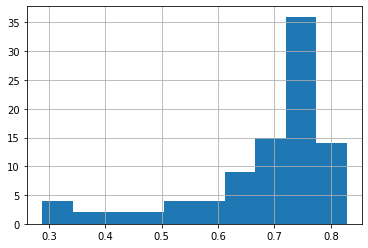

In [26]:
t.data_test['prediction'].hist()

# Active Learning (Apenas um teste)

In [27]:
from scipy import stats
class active_learning(Judger):
  def __init__(self, data):
    self.data = data
    # print(self.data['label'])
    super(active_learning, self).__init__(data = self.data, configure_text=False)
    
    
 
  def __call__(self):
    clear_output()
    # Quais dados sao nao  rotulados
    criteria_na = self.data['label'].isna()

    # print(self.data)

    # Se acabar de rotular todos os dados
    if sum(criteria_na) == 0:
      return print('Finish')

    # Index aleatorio para selecionar um texto para classificacao
    unlabeled_data = self.data.loc[criteria_na]
    indexs_unlabeled = unlabeled_data.index
    
    prediction_unlabeled = unlabeled_data.loc[:, 'prediction']
    # prob = poisson.cdf(indexs_unlabeled, mu=1)
    
    kernel = stats.gaussian_kde(prediction_unlabeled)
    
    prob = kernel(prediction_unlabeled) / sum( kernel(prediction_unlabeled))


    self.index = np.random.choice(indexs_unlabeled, 1,
                                  replace=False,
                                  p = prob
                                  ).item()

    # Guarda qual index foi separado pra classificar
    self.selected_indx.append(self.index)

    # Texto e Label do index aleatorio
    text = self.data.loc[self.index, 'text']
    label = self.data.loc[self.index, 'label']
    prediction = self.data.loc[self.index, 'prediction']
    
    
    # Print de alguns resultados
    print('Unlabed:', sum(criteria_na))
    print(
          "Not included examples:", self.excluded_count,"|",
          "Included examples:", self.included_count)
    display(self.hbox)
    
    print('Prediction:', prediction)
    # print('Included:', self.treshold <= prediction)

    print('Previos Label:', label)
    print('Text:')
    display(Markdown(text))



In [28]:
ranked_test_data['label'] = np.nan

ac = active_learning(data = ranked_test_data)

ac()

Unlabed: 92
Not included examples: 0 | Included examples: 0


Prediction: 0.7601123
Previos Label: nan
Text:


A Survey of Deep-Learning Applications in Ultrasound: Artificial Intelligence-Powered Ultrasound for Improving Clinical Workflow.. 